In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime
%matplotlib inline

u_data = pd.read_table("u.data",index_col=False,header=None)
u_data.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


first of all dowloana data

In [2]:
u_item = pd.read_csv("u.item",sep='|', encoding='latin-1',header=None,index_col=False)
u_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
u_user = pd.read_csv("u.user",sep="|",header=None,index_col=False)
u_user.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


rename columns

In [4]:
new_name_1 = ["movie_id","movie_title","release_date","video_release_date","IMDb_URL",
"unknown", "Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary",
              "Drama","Fantasy", "Film_Noir",  "Horror","Musical","Mystery","Romance",
              "Sci-Fi", "Thriller","War","Western"]
new_name_2 = ["user_id","movie_id","rating","timestamp"]
new_name_3 = ["user_id", "age","gender","occupation", "zip_code"]

In [5]:
def change_name_columns(data,new_name):
    new_name = dict(zip(list(data),new_name))
    return data.rename(new_name,axis =1)

u_item = change_name_columns(u_item,new_name_1)
u_data = change_name_columns(u_data,new_name_2)
u_user = change_name_columns(u_user,new_name_3)

In [6]:
u_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


find nan and delete them

In [7]:
u_user.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [8]:
u_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


change the format of column releas date

In [9]:
u_item.isna().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Childrens                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film_Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [10]:
u_item.isna().apply(pd.value_counts)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1682.0,1682.0,1681,NaN,1679,1682.0,1682.0,1682.0,1682.0,1682.0,...,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0
True,NaN,NaN,1,1682.0,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


find unkwown an delete them

In [11]:
u_item[u_item["unknown"] == 1]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
u_item["release_date"] = u_item["release_date"].apply(lambda x:str(x).split("-")[-1])
u_item = u_item.drop(labels=["unknown","IMDb_URL","video_release_date"],axis=1)
u_item = u_item.drop(labels=[266,1372],axis=0)
u_item.head()

,movie_id,movie_title,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
u_item.isna().apply(pd.value_counts)

,movie_id,movie_title,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,...,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [14]:
u_data.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and
'occupation', from their respective data frames

In [15]:
full_table = u_user.merge(u_data,on="user_id")
full_table.head()

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [16]:
full_table.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
movie_id      0
rating        0
timestamp     0
dtype: int64

In [17]:
full_table = full_table.dropna()

[Text(0.5, 1.0, 'Count of age')]

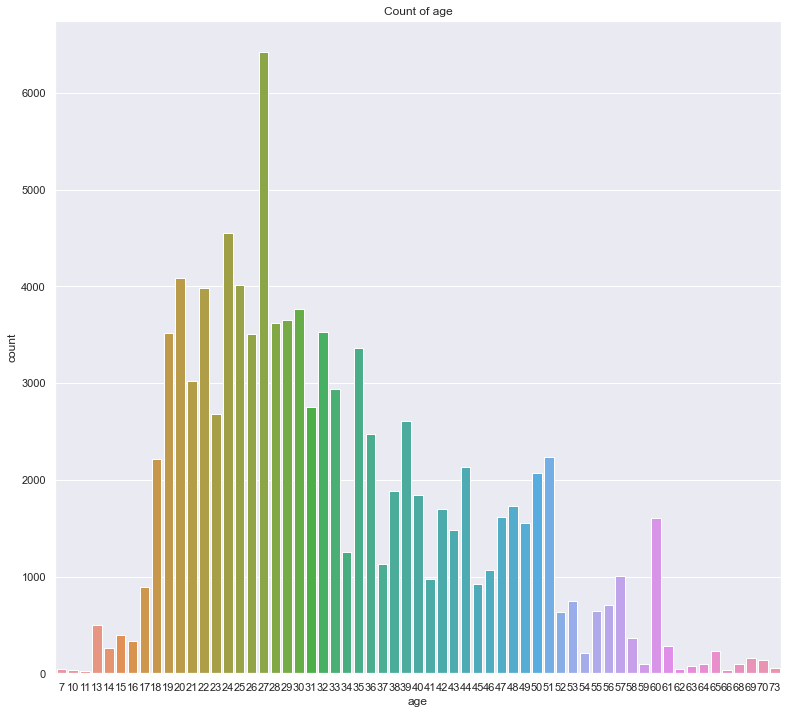

In [18]:
sns.set(rc={'figure.figsize':(13,12)})
sns.countplot(data=full_table,x="age").set(title='Count of age')

[Text(0.5, 1.0, 'Count of rating')]

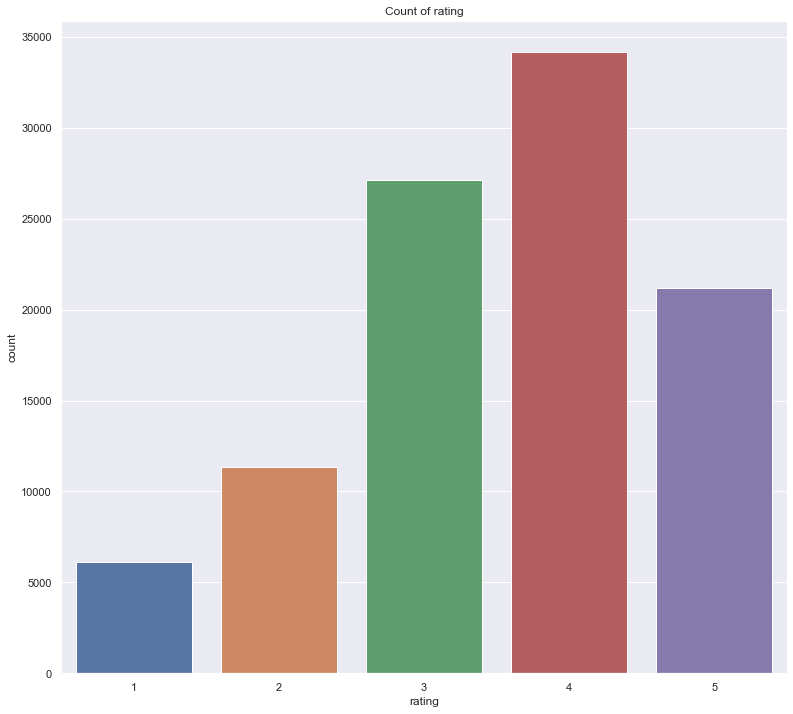

In [19]:
sns.set(rc={'figure.figsize':(13,12)})
sns.countplot(data=full_table,x="rating").set(title='Count of rating')

[Text(0.5, 1.0, 'Count of gender')]

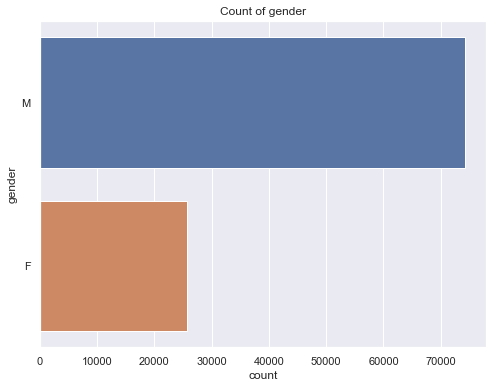

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(data=full_table,y="gender").set(title='Count of gender')

[Text(0.5, 1.0, 'Count of occupation')]

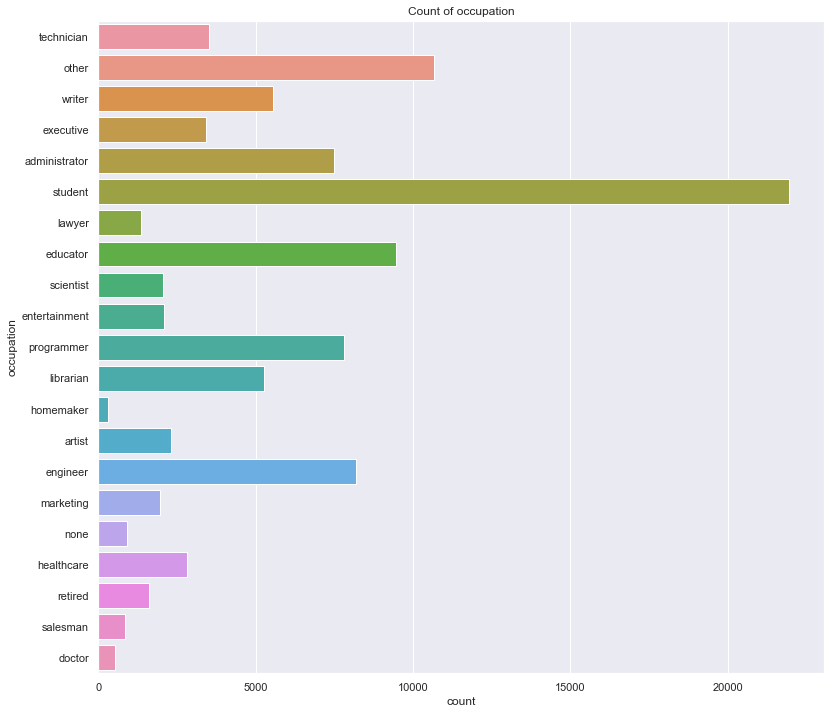

In [21]:
sns.set(rc={'figure.figsize':(13,12)})
sns.countplot(data=full_table,y="occupation").set(title='Count of occupation')

[Text(0.5, 1.0, 'release_date of occupation')]

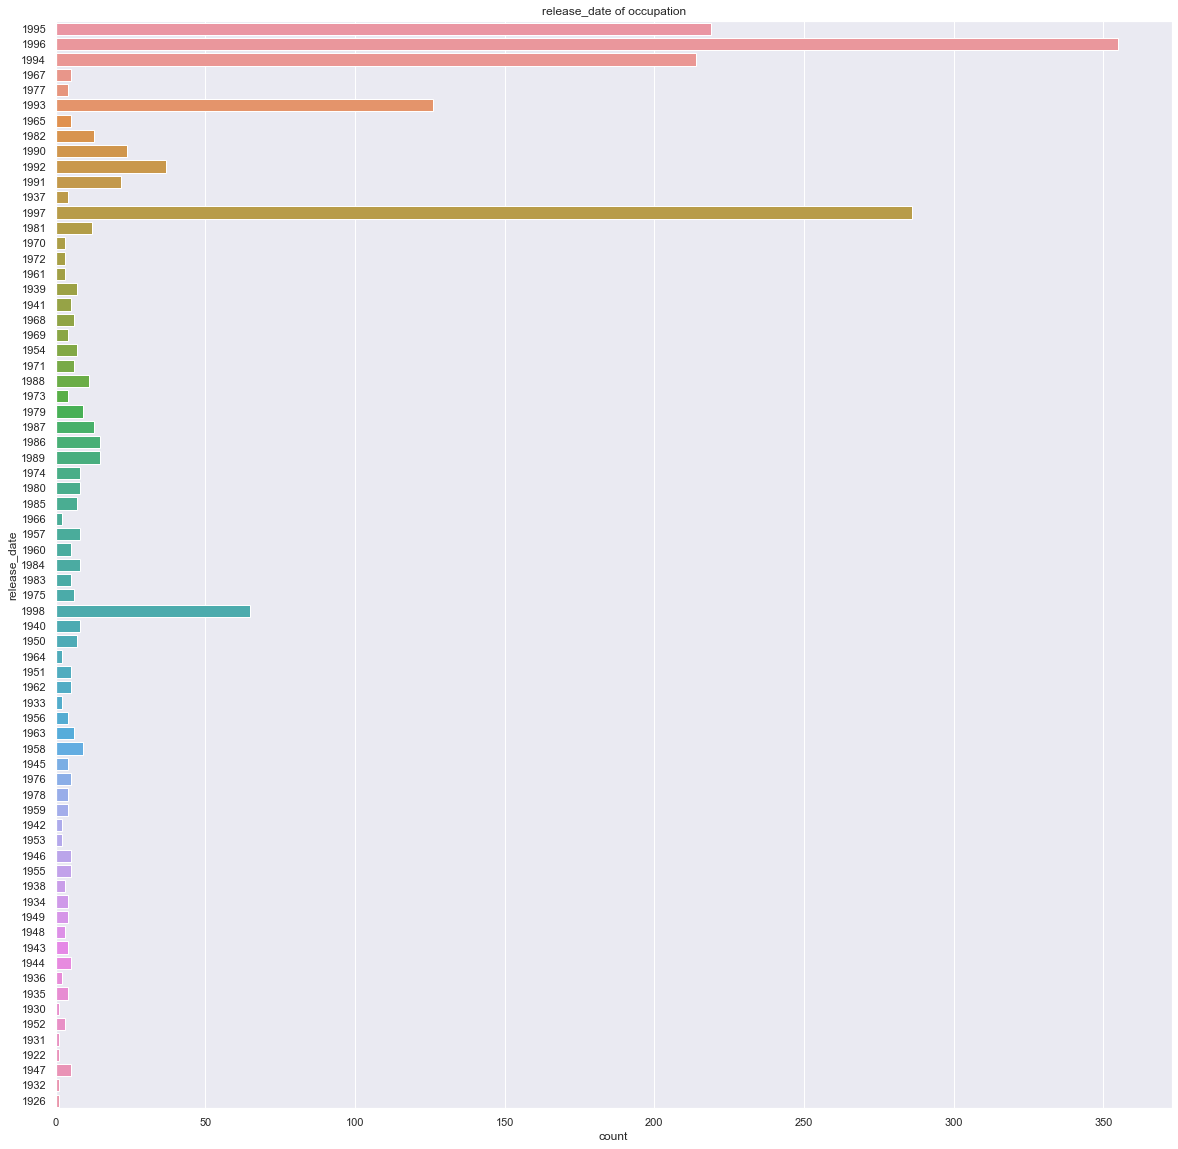

In [22]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(data=u_item,y="release_date").set(title='release_date of occupation')

Visualize how popularity of Genres has changed over the years. From the graph
one should be able to see for any given year, movies of which genre got released
the most.

In [23]:
test_table = u_item.groupby(by = ["release_date"],as_index=False).aggregate({
     "Action":"sum",
     "Adventure":"sum",
     "Animation":"sum",
     "Childrens":"sum",
     "Comedy":"sum",
     "Crime":"sum",
     "Documentary":"sum",
     "Drama":"sum",
     "Fantasy":"sum",
     "Film_Noir":"sum",
     "Horror":"sum",
    "Musical":"sum",
    "Mystery":"sum",
    "Romance":"sum",
    "Sci-Fi":"sum",
    "Thriller":"sum",
    "War":"sum",
    "Western":"sum"
})

test_table = test_table.T
test_table

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
release_date,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


In [24]:
def new_head(df):
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df

test_table = new_head(test_table).astype(np.uint16)
test_table

release_date,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film_Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


<AxesSubplot:xlabel='release_date'>

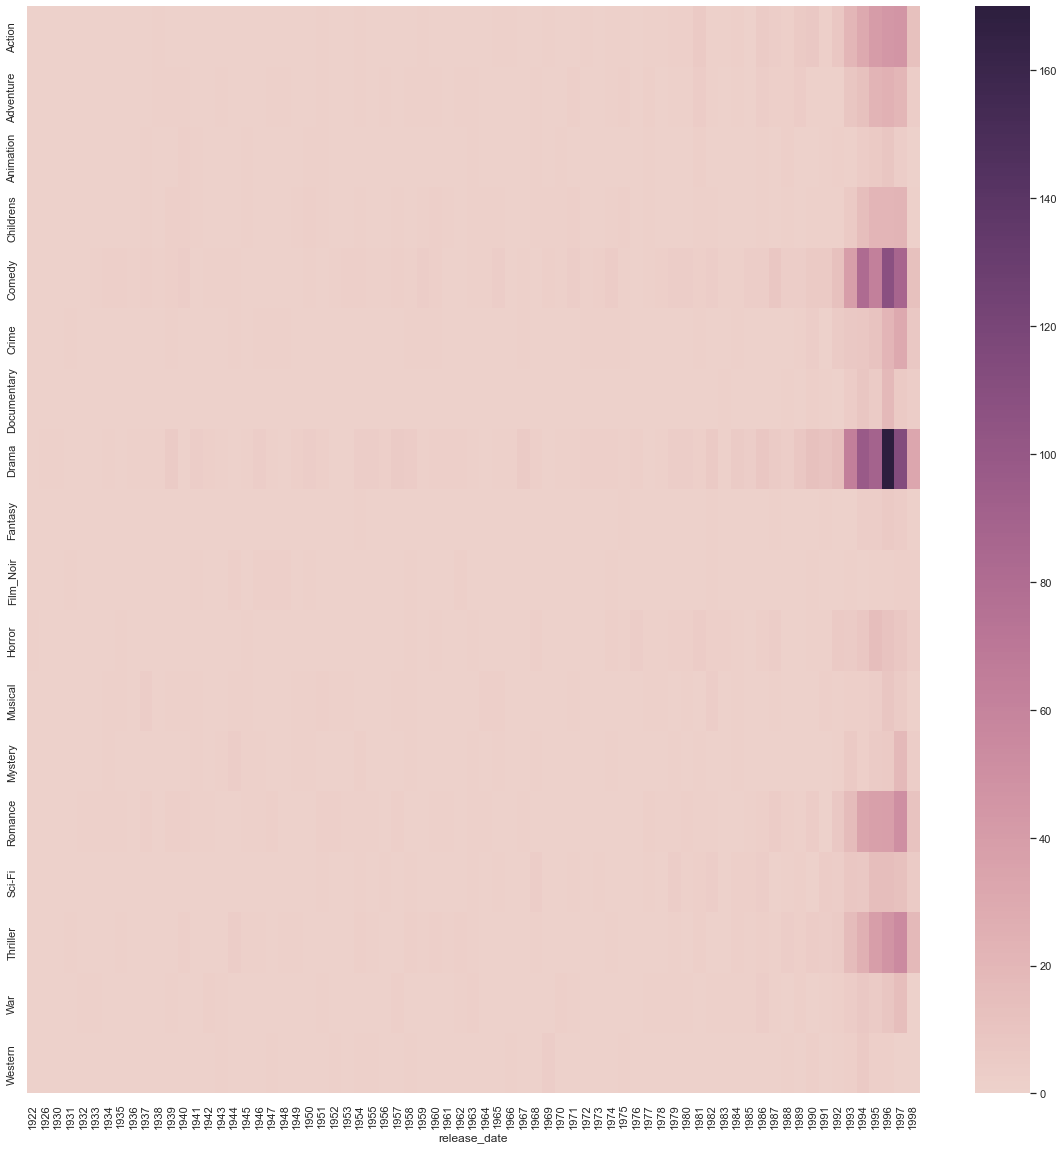

In [25]:
sns.heatmap(data=test_table, cmap=sns.cubehelix_palette(as_cmap=True))

Display the top 25 movies by average rating, as a list/series/dataframe.
Note:- Consider only the movies which received atleast a 100 ratings

In [34]:
full_table = full_table.merge(u_item,on="movie_id")
full_table

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,movie_title_x,release_date_x,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,863,17,M,student,60089,1679,3,889289491,B. Monkey (1998),1998,...,0,0,0,0,0,1,0,1,0,0
99986,863,17,M,student,60089,1678,1,889289570,Mat' i syn (1997),1998,...,0,0,0,0,0,0,0,0,0,0
99987,863,17,M,student,60089,1680,2,889289570,Sliding Doors (1998),1998,...,0,0,0,0,0,1,0,0,0,0
99988,896,28,M,writer,91505,1681,3,887160722,You So Crazy (1994),1994,...,0,0,0,0,0,0,0,0,0,0


In [57]:
prom_table = full_table.groupby(by = 'movie_title',as_index=False).aggregate({"movie_id":"count",
                                                               'rating':"mean"}).rename(columns={"movie_title":"movie_title",
                                                                                        "movie_id":"count_message",
                                                                                        "rating":"rating_mean"})
prom_table[prom_table["count_message"]>=100].sort_values(by = "rating_mean",ascending = False).head(25)

,movie_title,count_message,rating_mean
318,"Close Shave, A (1995)",112,4.491071
1280,Schindler's List (1993),298,4.466443
1651,"Wrong Trousers, The (1993)",118,4.466102
273,Casablanca (1942),243,4.456790
1316,"Shawshank Redemption, The (1994)",283,4.445230
1214,Rear Window (1954),209,4.387560
1571,"Usual Suspects, The (1995)",267,4.385768
1397,Star Wars (1977),583,4.358491
3,12 Angry Men (1957),125,4.344000
303,Citizen Kane (1941),198,4.292929


Verify the following statements (no need of doing a statistical test. Compare 
absolute numbers):

o Men watch more drama than women

o Men watch more Romance than women

o Women watch more Sci-Fi than me

In [51]:
full_table.head()

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,movie_title_x,release_date_x,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),1994,...,0,0,0,0,0,0,0,0,0,0


In [66]:
full_table.groupby(by = "gender",as_index=False).aggregate({
    "Drama":"sum"
})

,gender,Drama
0,F,11008
1,M,28887


True

In [54]:
full_table.groupby(by = "gender",as_index=False).aggregate({
    "Romance":"sum"
})

,gender,Romance
0,F,5858
1,M,13603


True

In [55]:
full_table.groupby(by = "gender",as_index=False).aggregate({
    "Sci-Fi":"sum"
})

,gender,Sci-Fi
0,F,2629
1,M,10101


False

in procent

In [67]:
full_table.groupby(by = 'gender',as_index=False).mean()

,gender,user_id,age,movie_id,rating,timestamp,Action_x,Adventure_x,Animation_x,Childrens_x,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,F,475.010957,32.314826,444.970277,3.531510,8.838516e+08,0.211438,0.122037,0.038659,0.086720,...,0.014104,0.014958,0.046507,0.056026,0.051053,0.227601,0.102145,0.197607,0.085049,0.014414
1,M,458.164831,33.197651,418.798039,3.529333,8.834180e+08,0.271333,0.142919,0.035151,0.066665,...,0.013320,0.018154,0.055487,0.047298,0.052941,0.183200,0.136037,0.226068,0.097088,0.019973


In [74]:
full_table.groupby(by = 'gender',as_index=False).mean()[["gender","Sci-Fi","Romance","Drama"]]

,gender,Sci-Fi,Romance,Drama
0,F,0.102145,0.227601,0.427694
1,M,0.136037,0.183200,0.389040


ALL was Wrong(